前置知识
    文本特征的表示：
       对文本数据编码最简单的办法就是单词计数,count
       scikit-learn 中可以使用countVectorizer 计数向量器
       默认情况下这个函数以稀疏矩阵形式存储特征矩阵X

       (0-1)编码 DictVectorizer,工作方式是只需将包含数据的一个字典
       送入fit_transform函数，该函数自动确定编码哪些特征, 若指定sparse = True 返回稀疏矩阵

In [89]:
'''countVectorizer 使用'''
from sklearn.feature_extraction.text import CountVectorizer
sample = ['feature money','feature selection','feature extraction']

Vect = CountVectorizer() #vect 对象
X = Vect.fit_transform(sample)
dir(Vect),Vect.get_feature_names() # ['extraction', 'feature', 'money', 'selection'])v

(['__class__',
  '__delattr__',
  '__dict__',
  '__dir__',
  '__doc__',
  '__eq__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__getstate__',
  '__gt__',
  '__hash__',
  '__init__',
  '__init_subclass__',
  '__le__',
  '__lt__',
  '__module__',
  '__ne__',
  '__new__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__setattr__',
  '__setstate__',
  '__sizeof__',
  '__str__',
  '__subclasshook__',
  '__weakref__',
  '_char_ngrams',
  '_char_wb_ngrams',
  '_check_n_features',
  '_check_stop_words_consistency',
  '_check_vocabulary',
  '_count_vocab',
  '_get_param_names',
  '_get_tags',
  '_limit_features',
  '_more_tags',
  '_repr_html_',
  '_repr_html_inner',
  '_repr_mimebundle_',
  '_sort_features',
  '_stop_words_id',
  '_validate_data',
  '_validate_params',
  '_validate_vocabulary',
  '_warn_for_unused_params',
  '_white_spaces',
  '_word_ngrams',
  'analyzer',
  'binary',
  'build_analyzer',
  'build_preprocessor',
  'build_tokenizer',
  'decode',
  'decode_error',

基于决策树进行医疗诊断
涉及到的数学知识与算法运算
    基尼系数(Gini)
    信息增益
    方差缩减
    过拟合和减枝

步骤：
    1.从数据中构建简单的决策树，并将其用于分类或者回归.
    2.使用基尼系数、信息增益和方差缩减确定下一步进行的决策

什么是决策树：
    是一种简单但功能强大的监督学习问题模型
    难点是：如何从数据中提取合适的特征

    关键：如何确认节点所包含的样本属于同一类, ->计算信息商的值大小,值越小,信息越少,集合纯度越高
    信息增益：

构建第一颗决策树(医疗领域数据)


In [90]:
'''数据生成，合成数据，也叫数据增广 data augmentation'''
'''常用的数据生成办法：
    旋转图片
    镜像图片
    Gan生成对抗网络

    要点：合成的数据应该与你的实际数据有相似的特征。合成的数据和实际数据越相似，对作为机器学习工程师的你也就越有利'''

'''弄清楚问题的类别，这是一个分类问题，实际上药品是类别标签'''
import random
import matplotlib.pyplot as plt
import numpy as np
def generate_data(nums):
    list_num = []
    for i in range(nums):
        new_entry = {}
        new_entry['age']  = random.randint(15,80)
        new_entry['sex'] = random.choice(['M','F'])
        new_entry['cholestrol '] = random.choice(['Low', 'High','Normal'])
        new_entry['Na'] = random.random() # 0-1之间 随机float
        new_entry['K'] = random.random()
        new_entry['drug'] = random.choice(['A','B','C','D'])
        list_num.append(new_entry)

    return list_num

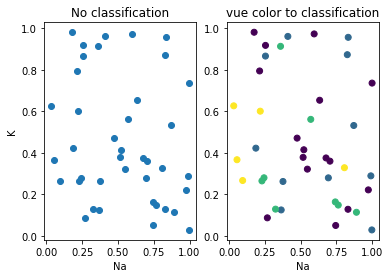

In [91]:
'''
1)确认分类标签,找到标签项目,并提取为target
2)删除字典中的所有drug项
'''
data = generate_data(40)
target = [d['drug'] for d in data]  # 数据的标签
target = [ord(t) - 65 for t in target]
# 把标签从原始数据中删除
for d in data:
    d.pop('drug')

'''以钾离子浓度为x axis，纳离子浓度为 y axis 表现数据分布情况'''

# color = 序列时，会按值的不同显示不同颜色
Na = [d['Na']for d in data]
K = [d['K'] for d in data]
plt.subplot(121)
plt.title('No classification')
plt.xlabel('Na')
plt.ylabel('K')
plt.scatter(Na,K)
plt.subplot(122)
plt.xlabel('Na')

plt.title('vue color to classification')
plt.scatter(Na,K,c= target)
plt.show()

数据处理
使用sklearn 中的 DictVectorizer 对字典类型的数据进行one-hot 向量化

In [92]:
'''数据处理'''
from sklearn.feature_extraction import DictVectorizer
Dic_vect = DictVectorizer(sparse=False) #数据不用稀疏矩阵压缩
data_pre = Dic_vect.fit_transform(data) #转为 one - hot向量矩阵
data[0],data_pre[0]

({'age': 67,
  'sex': 'M',
  'cholestrol ': 'Normal',
  'Na': 0.36415239058694204,
  'K': 0.12516641802367878},
 array([ 0.12516642,  0.36415239, 67.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ]))

In [93]:
'''数据拆分'''
import sklearn.model_selection as ms
xTrain,xTest,yTrain,yTest = ms.train_test_split(data_pre,target,test_size=0.2,random_state=7)

In [99]:
'''构建一颗决策树'''
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(xTrain,yTrain)
pre_y = dtree.predict(xTest)

Text(0, 6, 'the score is0.5')

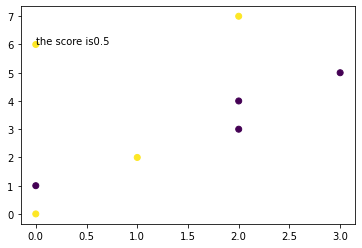

In [100]:
'''查看此决策树的性能'''
from sklearn import metrics
dtree_score = metrics.accuracy_score(pre_y,yTest)
light = (pre_y == yTest)+0
plt.scatter(pre_y,range(len(pre_y)),c = light)
plt.text(0,6,f'the score is{dtree_score}')

由于数据是随机生成的,分类性能很差可以理解